    Homework 05: Dtree
    AMRUTHA KANAKATTE RAVISHANKAR
    CWID :20027346
This task is to perform on Decision Tree Classifier, which divides data into subsets according to feature values and uses decision rules at each node to predict target classes.

In [65]:
#libraries to import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [66]:
# Load dataset
df = pd.read_csv('breast-cancer-wisconsin.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sample  699 non-null    int64 
 1   F1      699 non-null    int64 
 2   F2      699 non-null    int64 
 3   F3      699 non-null    int64 
 4   F4      699 non-null    int64 
 5   F5      699 non-null    int64 
 6   F6      699 non-null    object
 7   F7      699 non-null    int64 
 8   F8      699 non-null    int64 
 9   F9      699 non-null    int64 
 10  Class   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [67]:
#Handling missing data
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.dtype == 'object' else x)
df.dropna(inplace=True)

In [68]:
#Feature columns
feature_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']
for col in feature_columns:
    df[col] = df[col].astype('category')

In [69]:
# Assigning Features and Labels
X = df[feature_columns]
y = df['Class']

In [70]:
#Train and Test Split(0.7 and 0.3 respectively)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [71]:
#Initializing and training using Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)  # 'gini' is default for CART
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

The Gini impurity is a metric used in decision tree algorithms to measure how often a randomly chosen element from the dataset would be incorrectly classified if it were randomly labeled according to the distribution of labels in a given subset.

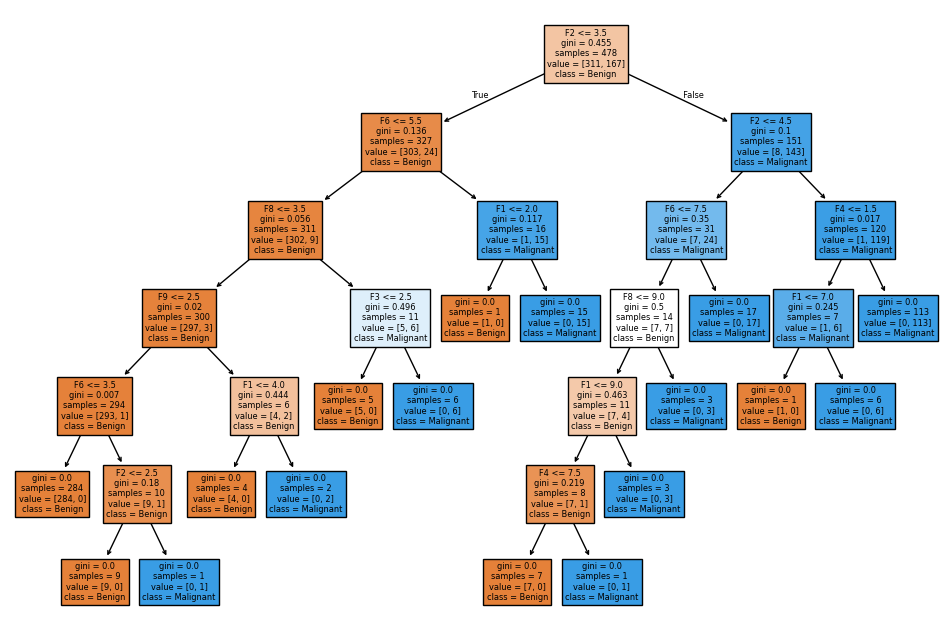

In [72]:
#Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_columns, class_names=['Benign', 'Malignant'], filled=True)
plt.show()

In [73]:
#Prediction & Classification Report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96       133
   Malignant       0.94      0.90      0.92        72

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205

Confusion Matrix:
[[129   4]
 [  7  65]]


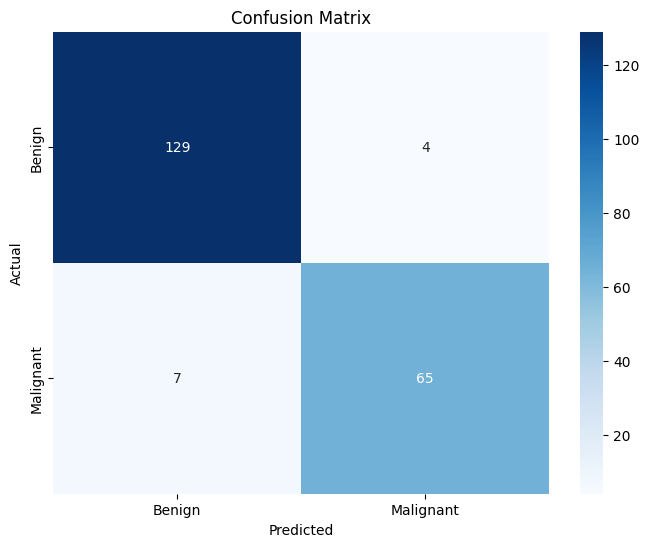

In [74]:
# Plotting Confusion Matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()